# INTRODUCTION

> Hello 👋. Pada projek kali ini, saya akan melakukan analisis sentimen terhadap ulasan pengguna aplikasi Sayurbox. Sayurbox merupakan aplikasi e-grocery yang memberikan kemudahan bagi petani lokal untuk menjual hasil panennya dalam keadaan segar kepada konsumen. 

> Tujuan dilakukannya analisis sentimen adalah untuk mengetahui ulasan pengguna aplikasi Sayurbox, cenderung positif atau negatif. 

> Pengambilan data ini dilakukan melalui website google play menggunakan teknik web crawling dimulai dari bulan Maret 2020 sampai dengan Maret 2022 dengan jumlah data sebesar 1905 ulasan. 

> Analisis ini menggunakan kamus slangword yang berisi kata baku dan tidak baku berasal dari github taudataid dan dapat diakses melalui link https://github.com/taudataid/eLearning untuk merubah kata ulasan yang mengandung kata tidak baku, salah eja, dan kata singkat menjadi kata baku sesuai dengan Kamus Besar Bahasa Indonesia.

> Metode yang digunakan untuk klasifikasi sentimen adalah lexicon-based menggunakan kamus Inset Lexicon yang dapat diunduh melalui github https://github.com/fajri91/InSet sedangkan algoritma yang digunakan adalah Support Vector Machine.



---



# Import Library

In [ ]:
!pip install google-play-scraper
from google_play_scraper import Sort, reviews_all, reviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# scraping review sayurbox
# sayurbox, continuation_token = reviews('com.sayurbox', # defaults to 0
#                                        lang='id', # defaults to 'id'
#                                        country='id', # defaults to 'id'
#                                        sort=Sort.NEWEST, # defaults to sort.MOST_RELEVANT
#                                        count=1905) 

In [ ]:
# data_sayurbox = pd.DataFrame(sayurbox)
# data_sayurbox

In [ ]:
# data_sayurbox.to_excel('sayurbox.xlsx', index=False)
# data_sayurbox

# Connect to Google Drive 

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1pb4L9tmt4xKxNe4wVKXdtj2Kh9ynx_Ef' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('sayurbox.xlsx')  

# Load the datasets from google drive

In [ ]:
sayurbox = pd.read_excel('sayurbox.xlsx')
sayurbox

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5.0,0.0,1.57.1,2022-03-31 23:22:32,NaN,NaT
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5.0,0.0,1.57.1,2022-03-31 23:18:27,NaN,NaT
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5.0,0.0,1.57.2,2022-03-31 22:54:45,NaN,NaT
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5.0,0.0,1.57.1,2022-03-31 08:01:26,NaN,NaT
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5.0,0.0,1.57.1,2022-03-31 07:18:30,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
1900,gp:AOqpTOFy12madUDoRklqpjGh7dKX955689nBUYW2lT5...,arsy aura,https://play-lh.googleusercontent.com/a/AATXAJ...,Utk ketepatan waktu pengirimannya,5.0,0.0,1.36.0,2020-03-03 02:42:18,NaN,NaT
1901,gp:AOqpTOFERJZ2w6LKDcmpF0756LlTpOtj0NYpXeVviUT...,rendra pratama,https://play-lh.googleusercontent.com/a/AATXAJ...,"Aplikasi yang sangat membantu, mohon dapat dig...",5.0,0.0,1.35.4,2020-03-02 14:13:45,NaN,NaT
1902,gp:AOqpTOHafbw3Yi82R2fYYB6U2MjVFyH3JJ09OXus7dK...,Umil Ikrimah,https://play-lh.googleusercontent.com/a-/AOh14...,"Kwalitas nya gak sesuai deskripsi, awalnya ord...",1.0,0.0,NaN,2020-03-02 13:52:19,"Hi Umil Ikrimah,\nMohon maaf atas kendala yang...",2020-03-03 04:52:23
1903,gp:AOqpTOGfWerWwj4SQM2qLBw4tuVi3MsZxQnABbdxOXN...,pf susanti,https://play-lh.googleusercontent.com/a-/AOh14...,Murah dan segar,5.0,0.0,NaN,2020-03-02 13:05:27,NaN,NaT




---



# Data Exploration

In [ ]:
# print('Jumlah duplicate review dalam dataset:', sayurbox.duplicated().sum())

In [ ]:
info = sayurbox.info()
print('Ringkasan informasi:', info)
# info.to_excel('info.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1905 non-null   object        
 1   userName              1905 non-null   object        
 2   userImage             1905 non-null   object        
 3   content               1905 non-null   object        
 4   score                 1905 non-null   float64       
 5   thumbsUpCount         1905 non-null   float64       
 6   reviewCreatedVersion  1543 non-null   object        
 7   at                    1905 non-null   datetime64[ns]
 8   replyContent          790 non-null    object        
 9   repliedAt             790 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 149.0+ KB
Ringkasan informasi: None


## Find Missing Values

In [ ]:
print('Jumlah missing values disetiap kolom:\n', sayurbox.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     362
at                         0
replyContent            1115
repliedAt               1115
dtype: int64


## Removing Missing Values

In [ ]:
sayurbox = sayurbox.drop(['replyContent','repliedAt','reviewCreatedVersion'], axis=1)
sayurbox.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5.0,0.0,2022-03-31 23:22:32
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5.0,0.0,2022-03-31 23:18:27
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5.0,0.0,2022-03-31 22:54:45
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5.0,0.0,2022-03-31 08:01:26
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5.0,0.0,2022-03-31 07:18:30


## Delete timestamp in date columns

In [ ]:
sayurbox['at'] = pd.to_datetime(sayurbox['at']).dt.date

## rename the columns

In [ ]:
sayurbox.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah dirumah:', sayurbox.columns)

mengecek nama kolom yang sudah dirumah: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date'],
      dtype='object')


In [ ]:
import datetime as dt

In [ ]:
sayurbox['date'] = pd.to_datetime(sayurbox['date'])

In [ ]:
sayurbox['date'] = sayurbox['date'].dt.strftime('%Y-%m')

In [ ]:
import calendar

In [ ]:
sayurbox['year'] = pd.to_datetime(sayurbox['date']).dt.year
sayurbox['month'] = pd.to_datetime(sayurbox['date']).dt.month
sayurbox['month'] = sayurbox['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
sayurbox

,reviewId,userName,userImage,content,score,thumbsUpCount,date,year,month
0,gp:AOqpTOGPQzoGx9cunRdOEO55sIUtI_Ru8yzxvoCWJGs...,Yuni Yuni,https://play-lh.googleusercontent.com/a/AATXAJ...,pengiriman cepat..packing aman..barang fresh.....,5.0,0.0,2022-03,2022,Mar
1,gp:AOqpTOEjK4_ef6DxjLdSgTM-nqFVJ5VtYw3dn8QJTn_...,Happy Agus Artawan,https://play-lh.googleusercontent.com/a-/AOh14...,sesuai pesanan dan kurirnya ramah mohon dipert...,5.0,0.0,2022-03,2022,Mar
2,gp:AOqpTOGTrFCCRe7s6QOg1fNwh3RshF2TvlGSAmMlWwm...,Jakaria Amsari,https://play-lh.googleusercontent.com/a-/AOh14...,"pengiriman tepat waktu , pilihan tepat berbela...",5.0,0.0,2022-03,2022,Mar
3,gp:AOqpTOFGWeQQ_Qac8_bK6N3S7PR_QkZKPYS-ZQKZCHj...,novri apriyanto,https://play-lh.googleusercontent.com/a-/AOh14...,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,5.0,0.0,2022-03,2022,Mar
4,gp:AOqpTOFWShFpq3K6BiWL-EK_guK-AYaBcTldl_AbjyJ...,Meni Chandra,https://play-lh.googleusercontent.com/a-/AOh14...,sayur box makin mantap aja nih ..pertahanan ya,5.0,0.0,2022-03,2022,Mar
...,...,...,...,...,...,...,...,...,...
1900,gp:AOqpTOFy12madUDoRklqpjGh7dKX955689nBUYW2lT5...,arsy aura,https://play-lh.googleusercontent.com/a/AATXAJ...,Utk ketepatan waktu pengirimannya,5.0,0.0,2020-03,2020,Mar
1901,gp:AOqpTOFERJZ2w6LKDcmpF0756LlTpOtj0NYpXeVviUT...,rendra pratama,https://play-lh.googleusercontent.com/a/AATXAJ...,"Aplikasi yang sangat membantu, mohon dapat dig...",5.0,0.0,2020-03,2020,Mar
1902,gp:AOqpTOHafbw3Yi82R2fYYB6U2MjVFyH3JJ09OXus7dK...,Umil Ikrimah,https://play-lh.googleusercontent.com/a-/AOh14...,"Kwalitas nya gak sesuai deskripsi, awalnya ord...",1.0,0.0,2020-03,2020,Mar
1903,gp:AOqpTOGfWerWwj4SQM2qLBw4tuVi3MsZxQnABbdxOXN...,pf susanti,https://play-lh.googleusercontent.com/a-/AOh14...,Murah dan segar,5.0,0.0,2020-03,2020,Mar


# Data Visualization

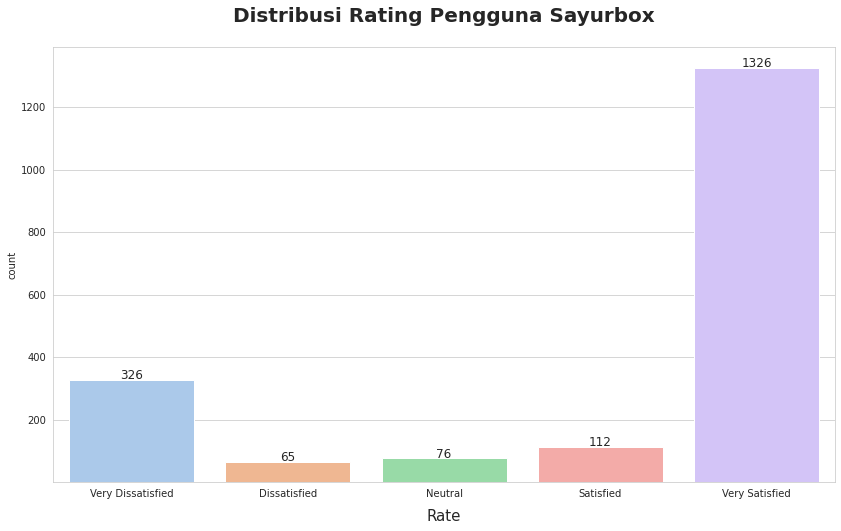

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Sayurbox', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

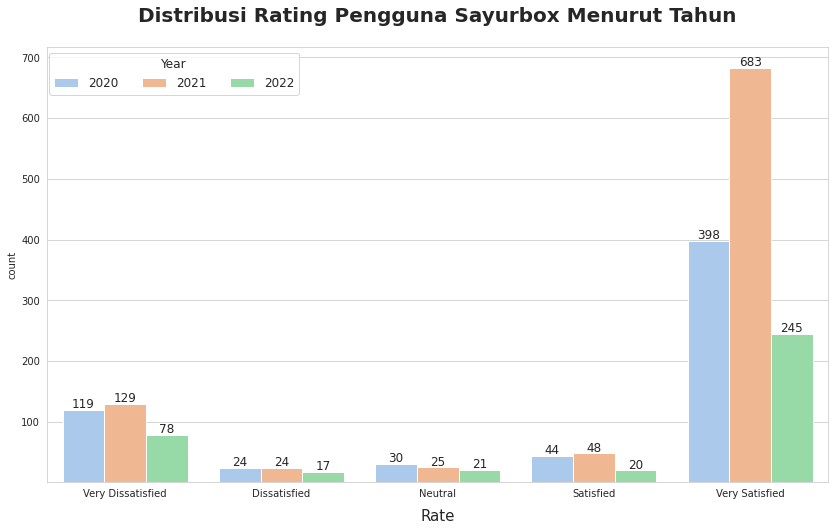

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Sayurbox Menurut Tahun', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [ ]:
sayurbox.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'year', 'month'],
      dtype='object')

In [ ]:
sayurbox.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', sayurbox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1905 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
sayurbox.head()

,content
0,pengiriman cepat..packing aman..barang fresh.....
1,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...
4,sayur box makin mantap aja nih ..pertahanan ya


In [ ]:
sayurbox.duplicated().sum()

115

In [ ]:
sayurbox.drop_duplicates(inplace=True)

In [ ]:
sayurbox.duplicated().sum()

0



---



# Data Preparation

# Case Folding

In [ ]:
def lowercase(review_text):
  low = review_text.lower()
  return low

sayurbox['clean_review'] = sayurbox['content'].apply(lambda low:lowercase(str(low)))

In [ ]:
sayurbox.head()

,content,clean_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat..packing aman..barang fresh.....
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...","pengiriman tepat waktu , pilihan tepat berbela..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak² mager cem saiaah 😆 udh gitu s...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih ..pertahanan ya


In [ ]:
sayurbox.to_excel('sayurbox_casefolding.xlsx', index=False)

# Cleaning Data 

## Remove the emoji of the text.

In [ ]:
import re

In [ ]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

In [ ]:
sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda emoji: remove_emoji(emoji))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_emoji.xlsx', index=False)

## removing hashtag

In [ ]:
# remove hashtag (optional)
def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_hashtag.xlsx', index=False)

## removing punctuation and number

In [ ]:
def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda num: remove_number(num))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_number.xlsx', index=False)

In [ ]:
def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_punctuation.xlsx', index=False)

In [ ]:
# menghapus superscript dalam string

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070" 
                      u"\U000000B9"  
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda num: remove_superscript(num))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_superscript.xlsx', index=False)

## removing words repetition

In [ ]:
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_huruf_repetition.xlsx', index=False)

In [ ]:
def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda word: repetition(word))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_kata_repetition.xlsx', index=False)

## removing whitespaces

In [ ]:
def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_whitespaces.xlsx', index=False)

## remove another words which doesn't give any information

In [ ]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz', 
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar', 
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)
  
sayurbox['clean_review'] = sayurbox['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [ ]:
sayurbox.to_excel('sayurbox_cleaning_another_words.xlsx', index=False)

In [ ]:
sayurbox.head()

,content,clean_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya


## change slang into standard terms (Normalization Phase)

In [ ]:
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id, 'word': file_id})

# Save file in Colab memory
downloaded.GetContentFile('slang.txt')

slangs = open('/content/slang.txt',"r",encoding="utf-8", errors='replace')
slangs= slangs.readlines()
slangs[:2]

['& : dan\n', 'dr : dari\n']

In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [ ]:
clean_text = []
for review in sayurbox['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [ ]:
clean_text

['pengiriman cepat pengepakan aman barang segar terima kasih sayuran box',
 'sesuai pesanan dan kurirnya ramah mohon dipertahankan',
 'pengiriman tepat waktu pilihan tepat berbelanja sayuran buah dan lain lain disini silahkan jangan ragu untuk belanja di sayurbox kerja bagus sukses terus tingkatkan kualitas dan kuantitas',
 'cocok buat ibu malas gerak macam saya sudah begitu sayurnya segar lebih murah dari supermarket sebelah semoga ke depan itemnya makin beragam ya',
 'sayuran box makin mantap saja nih pertahankan ya',
 'terima kasih ya promo nya banyak saran saja mungkin buat packaging nya bisa di kemas pakai mika plastik karena ada beberapa item yang hanya dibungkus plastik saja secara keseluruhan okay',
 'sering ya minimal promo nya supaya sering belanja nya di sayurbox tidak pindah ke lain hati mantap betul pokoknya',
 'mantap kualitas sayuran segar',
 'mantap mendukung',
 'sip',
 'sangat baik dan puas belanja di sayurbox',
 'terima kasih sayuran box cepat dan segar membantu ibu',

In [ ]:
sayurbox['normalization'] = clean_text

In [ ]:
sayurbox.head()

,content,clean_review,normalization
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya


In [ ]:
sayurbox.to_excel('sayurbox_normalization.xlsx', index=False)

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
sayurbox['final_text'] = sayurbox['normalization'].apply(lambda remove: remove_small_words(str(remove)))

In [ ]:
sayurbox.to_excel('sayurbox_remove_small_words.xlsx', index=False)

# Word Tokenizing

In [ ]:
import re

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
sayurbox['token'] = sayurbox['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
sayurbox.head()

,content,clean_review,normalization,final_text,token
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ..."
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe..."
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah..."
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]"


In [ ]:
sayurbox.to_excel('sayurbox_tokenize.xlsx', index=False)

# Wordcloud Visualization

In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [ ]:
review_all = []

for review in sayurbox['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
tahu
mohon
diperbaiki
sayurannya
segar
promo
gratis
ongkos
kirim
untuk
minimal
pembelian
tidak
cuman
siap
sayuran
buah
bumbu
dapur
ikan
susu
lain
lain
lengkap
barusan
beli
apel
tapi
apelnya
sudah
busuk
yang
lainnya
bagus
terima
kasih
pesan
kedua
kali
benar
bikin
kesel
kelihatan
semua
kurangnya
aplikasi
chat
pelayanan
pelanggan
error
dikasih
nomor
whatsapp
jawab
otomatis
cuma
suruh
tekan
nomor
untuk
kurir
pastikan
memberikan
paket
tangan
pembeli
jangan
dititip
karena
barang
mudah
busuk
kalau
tidak
langsung
dilakukan
penyimpanan
yang
baik
habis
layu
busuk
pesanan
saya
fungsinya
nomor
handphone
diminta
untuk
menghubungi
pembeli
akan
jangan
asal
kasih
mana
diaplikasi
pesanan
tidak
bisa
dilacak
speechless
mantap
betul
lockdown
sangat
membantu
hanya
tinggal
tekan
handphone
semua
kebutuhan
datang
dengan
cepat
aman
kualitas
tidak
ragukan
terima
kasih
sayurbox
dengan
kurir
yang
sangat
ramah
berdedikasi
tinggi
semoga
sayurbox
terus
berjaya
menja

In [ ]:
freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire sayurbox's review")
freq_dist

how many frequency distribution samples from an entire sayurbox's review


FreqDist({'tidak': 856, 'yang': 701, 'sayuran': 656, 'belanja': 545, 'saya': 511, 'sayurbox': 446, 'aplikasi': 414, 'banget': 398, 'sangat': 391, 'segar': 353, ...})

In [ ]:
common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 856), ('yang', 701), ('sayuran', 656), ('belanja', 545), ('saya', 511), ('sayurbox', 446), ('aplikasi', 414), ('banget', 398), ('sangat', 391), ('segar', 353), ('sudah', 352), ('bisa', 351), ('bagus', 327), ('kasih', 316), ('juga', 313), ('terima', 300), ('banyak', 248), ('barang', 247), ('buah', 246), ('pesan', 245), ('untuk', 240), ('lagi', 240), ('membantu', 231), ('promo', 219), ('pengiriman', 209), ('tapi', 207), ('dengan', 197), ('selalu', 190), ('jadi', 188), ('cepat', 170), ('kalau', 167), ('harga', 166), ('sampai', 161), ('saja', 158), ('karena', 154), ('lebih', 147), ('rumah', 142), ('pelayanan', 139), ('pandemik', 135), ('dari', 134), ('buat', 132), ('terus', 130), ('beli', 129), ('pesanan', 127), ('kualitas', 126), ('kirim', 126), ('mudah', 123), ('sekali', 123), ('mantap', 119), ('pelanggan', 117), ('semoga', 111), ('disini', 109), ('baik', 107), ('hari', 107), ('murah', 106), ('semua', 106), ('produk', 105), ('suka', 105), ('kupon', 104), ('belum', 102), ('wakt

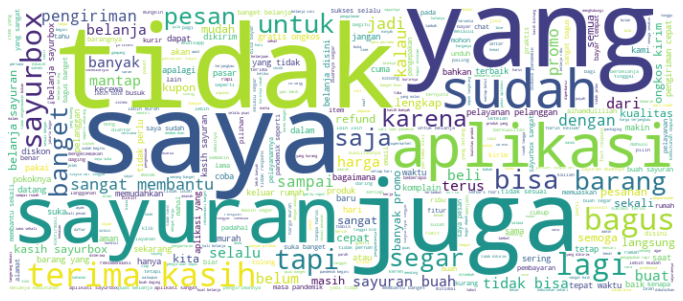

In [ ]:
# WordCloud Visualization

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,tidak,856
1,yang,701
2,sayuran,656
3,belanja,545
4,saya,511
...,...,...
475,masukkan,8
474,penting,8
473,kirimnya,8
472,plastik,8


In [ ]:
most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

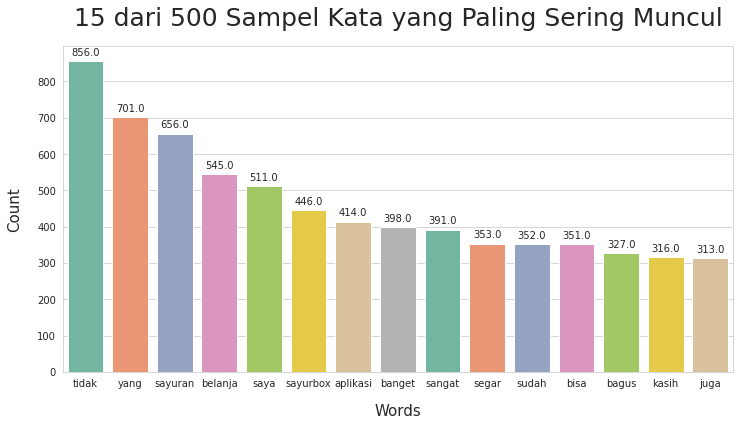

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Removing Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [ ]:
indonesian_stop = stopwords.words('indonesian')
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)
  
  return tokenize

sayurbox['stop_review'] = sayurbox['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [ ]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ..."
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe..."
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua..."
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ..."
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]"


In [ ]:
sayurbox.to_excel('sayurbox_stopwords.xlsx', index=False)

In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Text Normalization
## Stemming Normalization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

sayurbox['stem_review'] = sayurbox['stop_review'].apply(lambda stem:back_to_root(stem))

In [ ]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review,stem_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan


In [ ]:
sayurbox.to_excel('sayurbox_stemming.xlsx', index=False)

In [ ]:
sayurbox

,content,clean_review,normalization,final_text,token,stop_review,stem_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan
...,...,...,...,...,...,...,...
1900,Utk ketepatan waktu pengirimannya,utk ketepatan waktu pengirimannya,untuk ketepatan waktu pengirimannya,untuk ketepatan waktu pengirimannya,"[untuk, ketepatan, waktu, pengirimannya]","[ketepatan, pengirimannya]",tepat kirim
1901,"Aplikasi yang sangat membantu, mohon dapat dig...",aplikasi yang sangat membantu mohon dapat digu...,aplikasi yang sangat membantu mohon dapat digu...,aplikasi yang sangat membantu mohon dapat digu...,"[aplikasi, yang, sangat, membantu, mohon, dapa...","[aplikasi, membantu, mohon, kota, surabaya]",aplikasi bantu mohon kota surabaya
1902,"Kwalitas nya gak sesuai deskripsi, awalnya ord...",kwalitas nya gak sesuai deskripsi awalnya orde...,kualitas nya tidak sesuai deskripsi awalnya pe...,kualitas tidak sesuai deskripsi awalnya pesan...,"[kualitas, tidak, sesuai, deskripsi, awalnya, ...","[kualitas, sesuai, deskripsi, pesan, memaklumi...",kualitas sesuai deskripsi pesan maklum kecewa ...
1903,Murah dan segar,murah dan segar,murah dan segar,murah segar,"[murah, segar]","[murah, segar]",murah segar


In [ ]:
sayurbox.head()

,content,clean_review,normalization,final_text,token,stop_review,stem_review
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan


# Data Labeling

In [ ]:
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('lexicon_positive_ver1.csv') 

In [ ]:
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('lexicon_negative_ver1.csv') 

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'
  
  return score, polarity

In [ ]:
string = "aplikasi ini sangat bagus bagus dan jujur"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-7, 'negatif')

In [ ]:
sayurbox['prepos_text'] = sayurbox.stem_review.str.split()

In [ ]:
results = sayurbox['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
sayurbox['polarity_score'] = results[0]
sayurbox['polarity'] = results[1]
print(sayurbox['polarity'].value_counts())

positif    1029
negatif     588
netral      173
Name: polarity, dtype: int64


In [ ]:
sayurbox = sayurbox.replace('',np.nan, regex=True)

In [ ]:
sayurbox = sayurbox.dropna()

In [ ]:
sayurbox = sayurbox.reset_index(drop=True)

In [ ]:
print(sayurbox['polarity'].value_counts())

positif    1029
negatif     588
netral      132
Name: polarity, dtype: int64


In [ ]:
sayurbox[(sayurbox['polarity']=='netral')]

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
47,dtg tepat waktu jd kt bisa atur kegiatan,dtg tepat waktu jd kt bisa atur kegiatan,datang tepat waktu jadi kata bisa atur kegiatan,datang tepat waktu jadi kata bisa atur kegiatan,"[datang, tepat, waktu, jadi, kata, bisa, atur,...","[atur, kegiatan]",atur giat,"[atur, giat]",0,netral
48,Goo job,goo job,bagus kerja,bagus kerja,"[bagus, kerja]","[bagus, kerja]",bagus kerja,"[bagus, kerja]",0,netral
56,Gak bisa di download,gak bisa di download,tidak bisa di unduh,tidak bisa unduh,"[tidak, bisa, unduh]",[unduh],unduh,[unduh],0,netral
65,Pengiriman tepat waktu dan pengemasan bagus 👍👍👍,pengiriman tepat waktu dan pengemasan bagus,pengiriman tepat waktu dan pengemasan bagus,pengiriman tepat waktu pengemasan bagus,"[pengiriman, tepat, waktu, pengemasan, bagus]","[pengiriman, pengemasan, bagus]",kirim emas bagus,"[kirim, emas, bagus]",0,netral
79,"sangat bagus dan membantu sekali,,,terimakasih...",sangat bagus dan membantu sekali terimakasih s...,sangat bagus dan membantu sekali terima kasih ...,sangat bagus membantu sekali terima kasih say...,"[sangat, bagus, membantu, sekali, terima, kasi...","[bagus, membantu, terima, kasih, sayurbox]",bagus bantu terima kasih sayurbox,"[bagus, bantu, terima, kasih, sayurbox]",0,netral
...,...,...,...,...,...,...,...,...,...,...
1669,Pelayanan yang buruk dari servicenya. Tidak ad...,pelayanan yang buruk dari servicenya tidak ada...,pelayanan yang buruk dari service nya tidak ad...,pelayanan yang buruk dari service tidak bala...,"[pelayanan, yang, buruk, dari, service, tidak,...","[pelayanan, buruk, service, balasan, chat, bay...",layan buruk service balas chat bayar pakai gop...,"[layan, buruk, service, balas, chat, bayar, pa...",0,netral
1684,aplikasi yg memudahkan belanja sayuran dan bua...,aplikasi yg memudahkan belanja sayuran dan bua...,aplikasi yang memudahkan belanja sayuran dan b...,aplikasi yang memudahkan belanja sayuran buah...,"[aplikasi, yang, memudahkan, belanja, sayuran,...","[aplikasi, memudahkan, belanja, sayuran, buah,...",aplikasi mudah belanja sayur buah sayur buah s...,"[aplikasi, mudah, belanja, sayur, buah, sayur,...",0,netral
1694,Recomended,recomended,rekomendasi,rekomendasi,[rekomendasi],[rekomendasi],rekomendasi,[rekomendasi],0,netral
1696,"sehat2 ya kalian, terimakasih sudah mensuplai ...",sehat ya kalian terimakasih sudah mensuplai ke...,sehat ya kalian terima kasih sudah menyuplai k...,sehat kalian terima kasih sudah menyuplai keb...,"[sehat, kalian, terima, kasih, sudah, menyupla...","[sehat, terima, kasih, menyuplai, kebutuhan, h...",sehat terima kasih suplai butuh hari,"[sehat, terima, kasih, suplai, butuh, hari]",0,netral


In [ ]:
sayurbox.to_excel('sayurbox_labelling.xlsx', index=False)

In [ ]:
sayurbox = sayurbox.drop(sayurbox[sayurbox['polarity'] == 'netral'].index)
sayurbox = sayurbox.reset_index(drop=True)

In [ ]:
sayurbox.head(20)

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...,"[kirim, cepat, epak, aman, barang, segar, teri...",9,positif
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan,"[sesuai, pesan, kurir, ramah, mohon, tahan]",3,positif
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...,"[kirim, pilih, belanja, sayur, buah, silah, ra...",5,positif
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...,"[cocok, malas, gerak, sayur, segar, murah, sup...",-1,negatif
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan,"[sayur, mantap, tahan]",4,positif
5,"Thanks ya, promonya banyak. Saran aja mungkin ...",thanks ya promonya banyak saran aja mungkin bu...,terima kasih ya promo nya banyak saran saja mu...,terima kasih promo banyak saran saja mungkin...,"[terima, kasih, promo, banyak, saran, saja, mu...","[terima, kasih, promo, saran, packaging, kemas...",terima kasih promo saran packaging kemas pakai...,"[terima, kasih, promo, saran, packaging, kemas...",6,positif
6,"sering-sering yah min promo nya, spy sering be...",sering yah min promo nya spy sering belanja ny...,sering ya minimal promo nya supaya sering bela...,sering minimal promo supaya sering belanja ...,"[sering, minimal, promo, supaya, sering, belan...","[minimal, promo, belanja, sayurbox, pindah, ha...",minimal promo belanja sayurbox pindah hati man...,"[minimal, promo, belanja, sayurbox, pindah, ha...",2,positif
7,mantap kwalitas sayuran segar²,mantap kwalitas sayuran segar,mantap kualitas sayuran segar,mantap kualitas sayuran segar,"[mantap, kualitas, sayuran, segar]","[mantap, kualitas, sayuran, segar]",mantap kualitas sayur segar,"[mantap, kualitas, sayur, segar]",13,positif
8,Mantap mendukung,mantap mendukung,mantap mendukung,mantap mendukung,"[mantap, mendukung]","[mantap, mendukung]",mantap dukung,"[mantap, dukung]",9,positif
9,Sangat Baik Dan Puas Belanja Di SayurBox,sangat baik dan puas belanja di sayurbox,sangat baik dan puas belanja di sayurbox,sangat baik puas belanja sayurbox,"[sangat, baik, puas, belanja, sayurbox]","[puas, belanja, sayurbox]",puas belanja sayurbox,"[puas, belanja, sayurbox]",2,positif


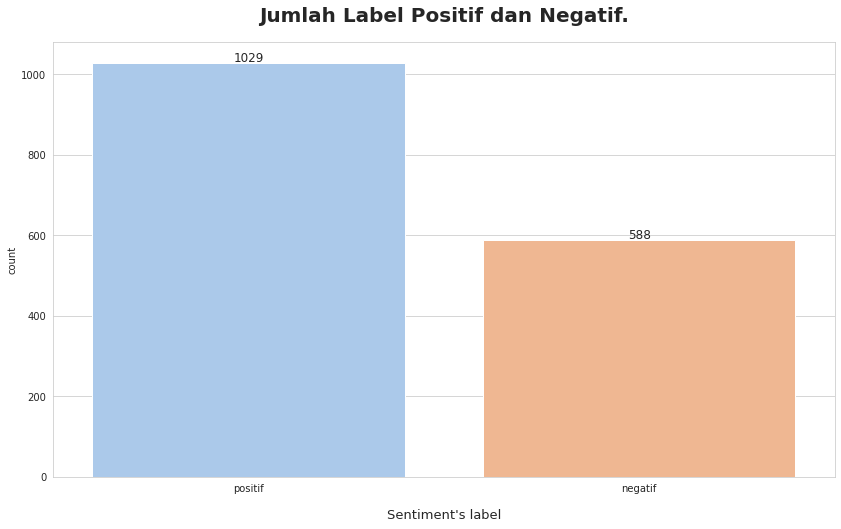

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=sayurbox, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# convert sentiment's label into 0 for positive and 1 for negatif
polarity = []
for convert in sayurbox['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
sayurbox['polarity'] = polarity

In [ ]:
sayurbox['polarity'] 

0       1
1       1
2       1
3      -1
4       1
       ..
1612    1
1613   -1
1614    1
1615    1
1616    1
Name: polarity, Length: 1617, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
fig = go.Figure()
fig = px.histogram(sayurbox, x='polarity_score', title='Sentiment polarity distribution',
                   labels={'polarity_score':'polarity score'}, color_discrete_sequence=['indianred'])

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
sayurbox.polarity.value_counts()

 1    1029
-1     588
Name: polarity, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = sayurbox.polarity.value_counts()[1]/sayurbox.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = sayurbox.polarity.value_counts()[-1]/sayurbox.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 63.64 %
percentage of negative sentiment: 36.36 %
difference between percentage positive and negative: 27.27 %


### Visualisasi Label Sentimen

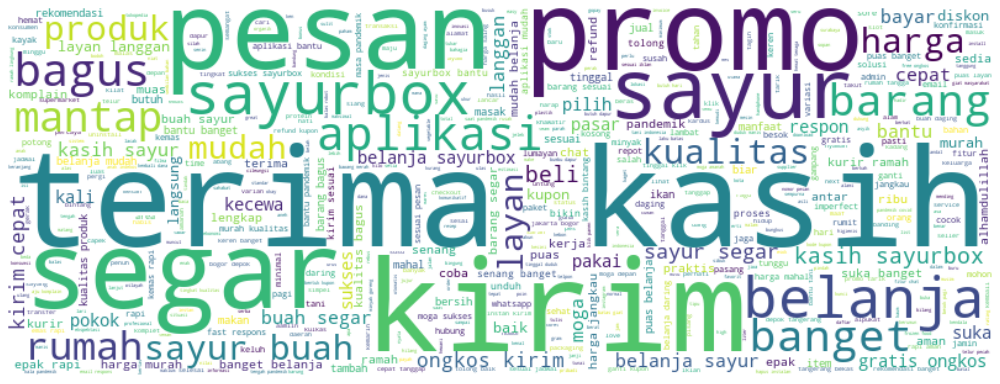

In [ ]:
sentiment_pos = ' '.join([review for review in sayurbox['stem_review'][sayurbox['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

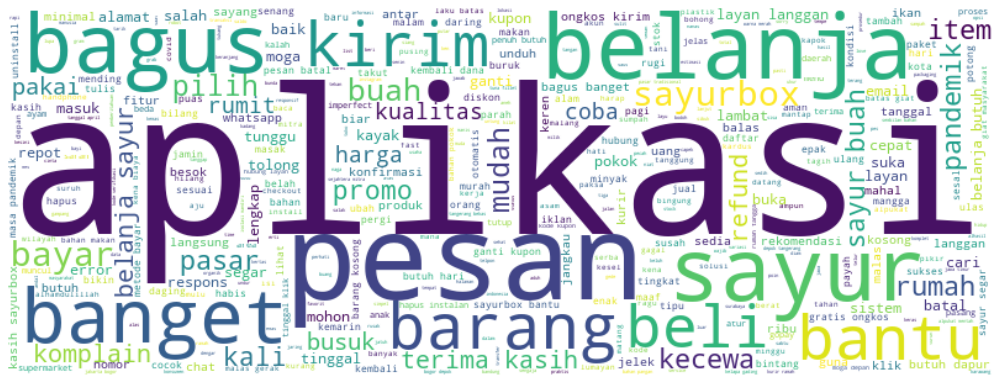

In [ ]:
sentiment_neg = ' '.join([review for review in sayurbox['stem_review'][sayurbox['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
sayurbox = sayurbox.replace('',np.nan, regex=True)

In [ ]:
sayurbox = sayurbox.dropna()

In [ ]:
sayurbox = sayurbox.reset_index(drop=True)

In [ ]:
sayurbox.to_excel("sayurbox_fix_dataset.xlsx", index=False)



---



# Splitting the review into train and test of text

In [ ]:
X = sayurbox['stem_review']
y = sayurbox['polarity']

In [ ]:
sayurbox

,content,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,pengiriman cepat..packing aman..barang fresh.....,pengiriman cepat packing aman barang fresh ter...,pengiriman cepat pengepakan aman barang segar ...,pengiriman cepat pengepakan aman barang segar ...,"[pengiriman, cepat, pengepakan, aman, barang, ...","[pengiriman, cepat, pengepakan, aman, barang, ...",kirim cepat epak aman barang segar terima kasi...,"[kirim, cepat, epak, aman, barang, segar, teri...",9,1
1,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan dan kurirnya ramah mohon dipert...,sesuai pesanan kurirnya ramah mohon dipertaha...,"[sesuai, pesanan, kurirnya, ramah, mohon, dipe...","[sesuai, pesanan, kurirnya, ramah, mohon, dipe...",sesuai pesan kurir ramah mohon tahan,"[sesuai, pesan, kurir, ramah, mohon, tahan]",3,1
2,"pengiriman tepat waktu , pilihan tepat berbela...",pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,pengiriman tepat waktu pilihan tepat berbelanj...,"[pengiriman, tepat, waktu, pilihan, tepat, ber...","[pengiriman, pilihan, berbelanja, sayuran, bua...",kirim pilih belanja sayur buah silah ragu bela...,"[kirim, pilih, belanja, sayur, buah, silah, ra...",5,1
3,Cocok buat emak² mager cem saiaah 😆 udh gitu s...,cocok buat emak mager cem saiaah udh gitu sayu...,cocok buat ibu malas gerak macam saya sudah be...,cocok buat malas gerak macam saya sudah begit...,"[cocok, buat, malas, gerak, macam, saya, sudah...","[cocok, malas, gerak, sayurnya, segar, murah, ...",cocok malas gerak sayur segar murah supermarke...,"[cocok, malas, gerak, sayur, segar, murah, sup...",-1,-1
4,sayur box makin mantap aja nih ..pertahanan ya,sayur box makin mantap aja nih pertahanan ya,sayuran box makin mantap saja nih pertahankan ya,sayuran makin mantap saja pertahankan,"[sayuran, makin, mantap, saja, pertahankan]","[sayuran, mantap, pertahankan]",sayur mantap tahan,"[sayur, mantap, tahan]",4,1
...,...,...,...,...,...,...,...,...,...,...
1612,Utk ketepatan waktu pengirimannya,utk ketepatan waktu pengirimannya,untuk ketepatan waktu pengirimannya,untuk ketepatan waktu pengirimannya,"[untuk, ketepatan, waktu, pengirimannya]","[ketepatan, pengirimannya]",tepat kirim,"[tepat, kirim]",2,1
1613,"Aplikasi yang sangat membantu, mohon dapat dig...",aplikasi yang sangat membantu mohon dapat digu...,aplikasi yang sangat membantu mohon dapat digu...,aplikasi yang sangat membantu mohon dapat digu...,"[aplikasi, yang, sangat, membantu, mohon, dapa...","[aplikasi, membantu, mohon, kota, surabaya]",aplikasi bantu mohon kota surabaya,"[aplikasi, bantu, mohon, kota, surabaya]",-6,-1
1614,"Kwalitas nya gak sesuai deskripsi, awalnya ord...",kwalitas nya gak sesuai deskripsi awalnya orde...,kualitas nya tidak sesuai deskripsi awalnya pe...,kualitas tidak sesuai deskripsi awalnya pesan...,"[kualitas, tidak, sesuai, deskripsi, awalnya, ...","[kualitas, sesuai, deskripsi, pesan, memaklumi...",kualitas sesuai deskripsi pesan maklum kecewa ...,"[kualitas, sesuai, deskripsi, pesan, maklum, k...",6,1
1615,Murah dan segar,murah dan segar,murah dan segar,murah segar,"[murah, segar]","[murah, segar]",murah segar,"[murah, segar]",5,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    SVM = SVC(kernel='linear')
    SVM.fit(X_train_vect, y_train)
    print(SVM.score(X_train_vect, y_train))
    predict = SVM.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict)
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.9814432989690721
confusion matrix:
 [[56 14]
 [ 4 88]]
              precision    recall  f1-score   support

          -1       0.93      0.80      0.86        70
           1       0.86      0.96      0.91        92

    accuracy                           0.89       162
   macro avg       0.90      0.88      0.88       162
weighted avg       0.89      0.89      0.89       162

Accuracy Score: 0.89
Recall Score: 0.9565217391304348
Precision Score: 0.8627450980392157


test size: 0.1
random state: 5
0.9807560137457044
confusion matrix:
 [[ 44   8]
 [  8 102]]
              precision    recall  f1-score   support

          -1       0.85      0.85      0.85        52
           1       0.93      0.93      0.93       110

    accuracy                           0.90       162
   macro avg       0.89      0.89      0.89       162
weighted avg       0.90      0.90      0.90       162

Accuracy Score: 0.9
Recall Score: 0.9272727272727272
Precision Score: 0.92

In [ ]:
data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[56, 14], [4, 88]]",0.888889,0.956522,0.862745
1,0.1,5,"[[44, 8], [8, 102]]",0.901235,0.927273,0.927273
2,0.1,10,"[[53, 8], [5, 96]]",0.919753,0.950495,0.923077
3,0.1,15,"[[36, 7], [6, 113]]",0.919753,0.949580,0.941667
4,0.1,20,"[[44, 5], [4, 109]]",0.944444,0.964602,0.956140
5,0.1,25,"[[47, 8], [7, 100]]",0.907407,0.934579,0.925926
6,0.2,0,"[[97, 25], [16, 186]]",0.873457,0.920792,0.881517
7,0.2,5,"[[98, 20], [18, 188]]",0.882716,0.912621,0.903846
8,0.2,10,"[[92, 18], [12, 202]]",0.907407,0.943925,0.918182
9,0.2,15,"[[82, 16], [10, 216]]",0.919753,0.955752,0.931034


In [ ]:
optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[56, 14], [4, 88]]",0.89,0.96,0.86
1,0.1,5,"[[44, 8], [8, 102]]",0.90,0.93,0.93
2,0.1,10,"[[53, 8], [5, 96]]",0.92,0.95,0.92
3,0.1,15,"[[36, 7], [6, 113]]",0.92,0.95,0.94
4,0.1,20,"[[44, 5], [4, 109]]",0.94,0.96,0.96
5,0.1,25,"[[47, 8], [7, 100]]",0.91,0.93,0.93
6,0.2,0,"[[97, 25], [16, 186]]",0.87,0.92,0.88
7,0.2,5,"[[98, 20], [18, 188]]",0.88,0.91,0.90
8,0.2,10,"[[92, 18], [12, 202]]",0.91,0.94,0.92
9,0.2,15,"[[82, 16], [10, 216]]",0.92,0.96,0.93


In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [ ]:
sayurbox.to_excel('sayurbox_fix.xlsx', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
X_train.shape

(1455,)

In [ ]:
X_test.shape

(162,)

In [ ]:
X_train

597     mantap murah gratis ongkos kirim kemas mantap ...
1031            aplikasi bantu beli buah suka banget sale
526                                 promo produk kualitas
482     bantu masyarakat mudah belanja sayur butuh rum...
729                                                 mudah
                              ...                        
924               senang belanja repot belanja luar promo
1247    sorry buruk layan aplikasi bagus bantu kualita...
271                   sayur keren kirim cepat harga murah
474     aplikasi bagus manfaat promo diskon suka bange...
1379    hati belanja barang uang hilang komplain call ...
Name: stem_review, Length: 1455, dtype: object

In [ ]:
print(X_train)
X_train.to_excel('x_train.xlsx', index=False)
X_test.to_excel('x_test.xlsx', index=False)
y_train.to_excel('y_train.xlsx', index=False)
y_test.to_excel('y_test.xlsx', index=False)

597     mantap murah gratis ongkos kirim kemas mantap ...
1031            aplikasi bantu beli buah suka banget sale
526                                 promo produk kualitas
482     bantu masyarakat mudah belanja sayur butuh rum...
729                                                 mudah
                              ...                        
924               senang belanja repot belanja luar promo
1247    sorry buruk layan aplikasi bagus bantu kualita...
271                   sayur keren kirim cepat harga murah
474     aplikasi bagus manfaat promo diskon suka bange...
1379    hati belanja barang uang hilang komplain call ...
Name: stem_review, Length: 1455, dtype: object


# Vector Representation

## TF IDF

In [ ]:
sayurbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         1617 non-null   object
 1   clean_review    1617 non-null   object
 2   normalization   1617 non-null   object
 3   final_text      1617 non-null   object
 4   token           1617 non-null   object
 5   stop_review     1617 non-null   object
 6   stem_review     1617 non-null   object
 7   prepos_text     1617 non-null   object
 8   polarity_score  1617 non-null   int64 
 9   polarity        1617 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 126.5+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()


In [ ]:
y_train.shape

(1455,)

In [ ]:
X_train_vect

<1455x1457 sparse matrix of type '<class 'numpy.float64'>'
	with 13770 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vect)

  (0, 528)	0.39229233853717627
  (0, 688)	0.24698212514883386
  (0, 617)	0.3955630080438264
  (0, 652)	0.18994187064011497
  (0, 925)	0.3037099165490921
  (0, 406)	0.313396036784397
  (0, 879)	0.29332185190812143
  (0, 793)	0.562195735787652
  (1, 1135)	0.7390554543924537
  (1, 101)	0.24152383314495735
  (1, 1268)	0.34057073627284024
  (1, 186)	0.2538256997818287
  (1, 132)	0.3096731483883863
  (1, 106)	0.2627968076330016
  (1, 63)	0.22380290468557107
  (2, 1034)	0.6292093471054674
  (2, 1040)	0.5523004420630251
  (2, 688)	0.5468636203040924
  (3, 807)	0.362038741028417
  (3, 1303)	0.411981602989888
  (3, 1117)	0.2512443214402517
  (3, 203)	0.5676217957716468
  (3, 1158)	0.15596906033275237
  (3, 130)	0.161749549738413
  (3, 872)	0.23021903751778386
  :	:
  (1454, 999)	0.22008726506535112
  (1454, 1180)	0.22008726506535112
  (1454, 69)	0.22008726506535112
  (1454, 330)	0.22008726506535112
  (1454, 1347)	0.2016691477311433
  (1454, 224)	0.18325103039693547
  (1454, 208)	0.17732172097212

In [ ]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

In [ ]:
df_tf

,aamiin,abai,abang,account,action,ada,adil,admin,adu,aduh,...,wortel,worth,wrap,wrong,wuruk,yogyakarta,yos,your,zaman,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




---



# Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [ ]:
predict = svm.predict(X_test_vect)

In [ ]:
predict

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1])

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [ ]:
predict_df

,predict
0,1
1,1
2,1
3,1
4,1
...,...
157,1
158,-1
159,-1
160,1


In [ ]:
predict_df.to_excel('hasil_prediksi.xlsx', index=False)

In [ ]:
print(svm.coef_) # values of weight

  (0, 905)	0.4374517468693236
  (0, 230)	0.23870175396110374
  (0, 998)	0.08941586324008693
  (0, 495)	0.08941586324008693
  (0, 366)	0.08941586324008693
  (0, 156)	0.08941586324008693
  (0, 816)	0.08030520628079121
  (0, 412)	0.08030520628079121
  (0, 646)	0.09337313011406488
  (0, 451)	0.08555915111899468
  (0, 1414)	0.16668693330489492
  (0, 967)	0.16668693330489492
  (0, 768)	0.15273765052936844
  (0, 1408)	0.3667836845058005
  (0, 679)	0.3667836845058005
  (0, 209)	0.17988817984175562
  (0, 205)	0.16483414387843562
  (0, 1187)	0.1389150830672381
  (0, 1065)	0.1389150830672381
  (0, 950)	0.25457980406864833
  (0, 1338)	0.2519519233821777
  (0, 177)	0.2519519233821777
  (0, 492)	0.3122285300405401
  (0, 1077)	0.015186081055841811
  (0, 821)	0.14238089273269824
  :	:
  (0, 530)	0.12573831176199413
  (0, 1132)	-0.9693935431902995
  (0, 1381)	-0.2202087634348471
  (0, 1159)	0.14361553674967587
  (0, 1103)	0.6313901113296665
  (0, 1034)	1.5085363462467696
  (0, 1005)	-0.5707455415269153

In [ ]:
print(svm.intercept_) # values of b

[-0.03075768]


In [ ]:
print(svm.classes_)

[-1  1]


In [ ]:
print(svm.dual_coef_)

  (0, 0)	-0.410681657192517
  (0, 1)	-1.0
  (0, 2)	-0.5207010483229887
  (0, 3)	-0.5250134715517161
  (0, 4)	-0.3776323562432474
  (0, 5)	-0.07364300447602687
  (0, 6)	-1.0
  (0, 7)	-1.0
  (0, 8)	-1.0
  (0, 9)	-0.7050447790357811
  (0, 10)	-1.0
  (0, 11)	-1.0
  (0, 12)	-0.658686494207314
  (0, 13)	-0.40991371235356927
  (0, 14)	-1.0
  (0, 15)	-0.6281711936146044
  (0, 16)	-0.8589115341485788
  (0, 17)	-0.20147358318474756
  (0, 18)	-0.737663439028339
  (0, 19)	-1.0
  (0, 20)	-0.7880961464661982
  (0, 21)	-0.8299114758349996
  (0, 22)	-1.0
  (0, 23)	-0.7258337017566514
  (0, 24)	-1.0
  :	:
  (0, 705)	1.0
  (0, 706)	1.0
  (0, 707)	0.6442367442312879
  (0, 708)	0.3459299694357195
  (0, 709)	1.0
  (0, 710)	0.228187800428736
  (0, 711)	0.27003781645323016
  (0, 712)	1.0
  (0, 713)	1.0
  (0, 714)	0.5663002179531442
  (0, 715)	1.0
  (0, 716)	1.0
  (0, 717)	1.0
  (0, 718)	1.0
  (0, 719)	1.0
  (0, 720)	0.6782731792372972
  (0, 721)	0.36309082595852066
  (0, 722)	1.0
  (0, 723)	0.582880327628307

In [ ]:
svm.score(X_train_vect, y_train)

0.9828178694158075

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.2222222222222222




---



## Final visualization

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"
  
  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

114
48


In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,48
1,1,114


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 70.37 %
percentage of negative sentiment: 29.63 %
difference between percentage positive and negative: 40.74 %


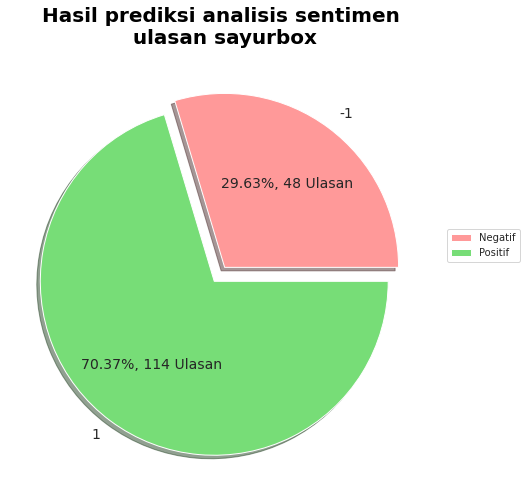

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues, 
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan sayurbox', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

# plt.savefig('Hasilprediksi_sayurbox.png')
plt.show()



---



# Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[ 44,   5],
       [  4, 109]])

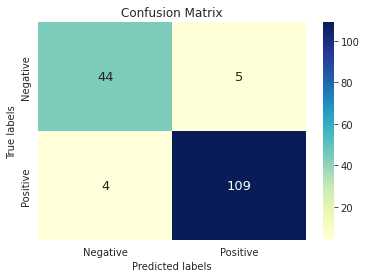

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.92      0.90      0.91        49
    Positive       0.96      0.96      0.96       113

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.93       162
weighted avg       0.94      0.94      0.94       162



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.94
Recall model: 0.96
Precision model: 0.96
